In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# Librerias de Red Neuronal
import tensorflow as tf
from tensorflow import keras
# importando datos
from sklearn.datasets import fetch_california_housing
# clasificacion de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

Informacion:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#

In [3]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [5]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']
             )

In [20]:
model_history = model.fit(X_train, y_train, epochs=40, 
                          validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3898 - mae: 0.4433 - val_loss: 0.3978 - val_mae: 0.4329
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3874 - mae: 0.4414 - val_loss: 0.4443 - val_mae: 0.4387
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3854 - mae: 0.4411 - val_loss: 0.4194 - val_mae: 0.4312
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3826 - mae: 0.4386 - val_loss: 0.4155 - val_mae: 0.4361
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3812 - mae: 0.4378 - val_loss: 0.3803 - val_mae: 0.4284
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3787 - mae: 0.4368 - val_loss: 0.4187 - val_mae: 0.4292
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3774 - mae: 0.4351 - val_loss: 0.3985 - val_mae: 0.4270
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [21]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3615 - mae: 0.4250


In [22]:
model_history.history

{'loss': [0.3898053467273712,
  0.3874152898788452,
  0.3853810429573059,
  0.3826400339603424,
  0.3811720311641693,
  0.3786640465259552,
  0.3774365186691284,
  0.3755159080028534,
  0.37358954548835754,
  0.3717530369758606,
  0.37018725275993347,
  0.3686564266681671,
  0.367572546005249,
  0.3660057783126831,
  0.36496496200561523,
  0.363820344209671,
  0.3626251518726349,
  0.3618927001953125,
  0.36057740449905396,
  0.3597814738750458],
 'mae': [0.44328969717025757,
  0.44139134883880615,
  0.4411434233188629,
  0.4386335611343384,
  0.43782517313957214,
  0.4367859661579132,
  0.4351237118244171,
  0.4343062937259674,
  0.4332500696182251,
  0.4323197305202484,
  0.43099445104599,
  0.43003496527671814,
  0.42933231592178345,
  0.42811211943626404,
  0.42784690856933594,
  0.42719635367393494,
  0.42631906270980835,
  0.4258972406387329,
  0.42492130398750305,
  0.42431437969207764],
 'val_loss': [0.3977949023246765,
  0.44426339864730835,
  0.4193873703479767,
  0.415506571

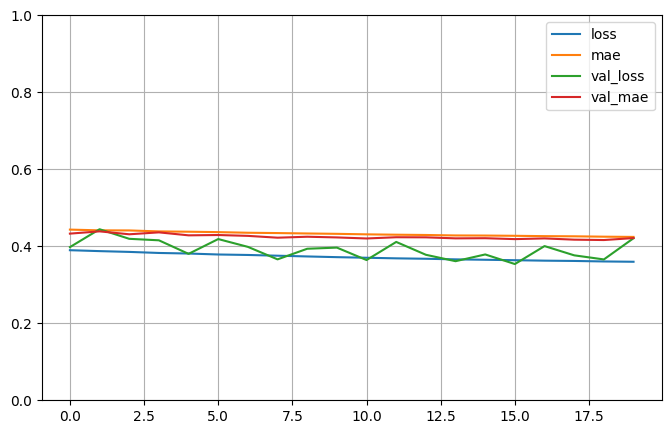

In [23]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
X_new = X_test[:3]

In [25]:
y_pred =model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 238ms/step
[[0.750714 ]
 [1.8701973]
 [4.0661507]]


In [26]:
print(y_test[:3])

[0.477   0.458   5.00001]


In [27]:
del model

In [28]:
keras.backend.clear_session()

## API Funcional

In [29]:
input_  = keras.layers.Input(shape=X_train.shape[1])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat  = keras.layers.concatenate([input_, hidden2])
output  = keras.layers.Dense(1)(concat)
model   = keras.models.Model(inputs=[input_],outputs=[output])

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [32]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']
             )

In [37]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3925 - mae: 0.4492 - val_loss: 0.3741 - val_mae: 0.4326
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3894 - mae: 0.4472 - val_loss: 0.4877 - val_mae: 0.4420
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3875 - mae: 0.4465 - val_loss: 0.4175 - val_mae: 0.4330
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3849 - mae: 0.4442 - val_loss: 0.3919 - val_mae: 0.4339
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3830 - mae: 0.4430 - val_loss: 0.3676 - val_mae: 0.4283
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3806 - mae: 0.4419 - val_loss: 0.4474 - val_mae: 0.4313
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3793 - mae: 0.4403 - val_loss: 0.3837 - val_mae: 0.4278
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [40]:
mae_test =model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3592 - mae: 0.4265


In [41]:
model_history.history

{'loss': [0.39246225357055664,
  0.38936397433280945,
  0.38749977946281433,
  0.3848666846752167,
  0.3830210268497467,
  0.38056644797325134,
  0.3793239891529083,
  0.37729886174201965,
  0.37543314695358276,
  0.3738676905632019,
  0.3724905848503113,
  0.3706561326980591,
  0.36997294425964355,
  0.36814484000205994,
  0.36680659651756287,
  0.3657243847846985,
  0.364234060049057,
  0.36339786648750305,
  0.36199092864990234,
  0.36074963212013245],
 'mae': [0.4491766095161438,
  0.4472029209136963,
  0.44654610753059387,
  0.4441530406475067,
  0.4430306553840637,
  0.44193413853645325,
  0.44032928347587585,
  0.4390389025211334,
  0.4380902349948883,
  0.43688467144966125,
  0.4355430006980896,
  0.4344765245914459,
  0.43352293968200684,
  0.4323335886001587,
  0.4316690266132355,
  0.43094807863235474,
  0.429890513420105,
  0.42905938625335693,
  0.4279296398162842,
  0.426978200674057],
 'val_loss': [0.3741484582424164,
  0.487667977809906,
  0.41745755076408386,
  0.39189

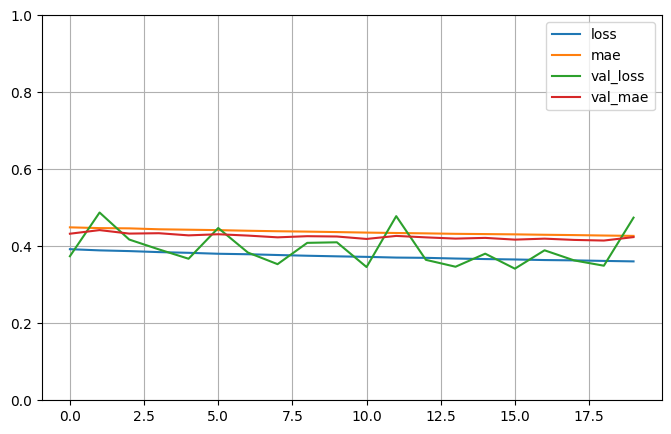

In [42]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Guardando y Restaurando

In [45]:
model.save('my_func_model.h5')

In [46]:
%pwd

'C:\\Users\\Raf\\Documents\\R\\Algoritmos hechos por mi\\6. Analisis de una Red Neuronal ANN'

In [47]:
del model

In [48]:
keras.backend.clear_session()

In [50]:
model = keras.models.load_model('my_func_model.h5')

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [52]:
y_pred = model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 134ms/step
[[0.7130532]
 [1.8710146]
 [3.8208122]]


## Usando puntos de control durante el entrenamiento

In [53]:
del model
keras.backend.clear_session()

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [56]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']
             )

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')

In [61]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 8s 23ms/step - loss: 0.7793 - mae: 0.6591 - val_loss: 0.7422 - val_mae: 0.6229
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6896 - mae: 0.6094 - val_loss: 0.6778 - val_mae: 0.5886
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6349 - mae: 0.5812 - val_loss: 0.6202 - val_mae: 0.5598
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5929 - mae: 0.5599 - val_loss: 0.6186 - val_mae: 0.5497
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5612 - mae: 0.5424 - val_loss: 0.5539 - val_mae: 0.5250
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5324 - mae: 0.5283 - val_loss: 0.5456 - val_mae: 0.5143
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5097 - mae: 0.5153 - val_loss: 0.5049 - val_mae: 0.4999
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0

In [65]:
del model
keras.backend.clear_session()

In [66]:
model = keras.models.load_model('Model-10.h5')

In [67]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.4477 - mae: 0.4769


### Usando solo el mejor modelo

In [76]:
del model
keras.backend.clear_session()

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [71]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']
             )

In [74]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Best_Model.h5', save_best_only=True)

In [75]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4726 - mae: 0.4944 - val_loss: 0.4325 - val_mae: 0.4722
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4613 - mae: 0.4879 - val_loss: 0.4243 - val_mae: 0.4713
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4515 - mae: 0.4833 - val_loss: 0.4162 - val_mae: 0.4614
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4427 - mae: 0.4781 - val_loss: 0.4076 - val_mae: 0.4611
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4353 - mae: 0.4737 - val_loss: 0.4021 - val_mae: 0.4550
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4282 - mae: 0.4704 - val_loss: 0.3952 - val_mae: 0.4503
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4224 - mae: 0.4667 - val_loss: 0.3897 - val_mae: 0.4476
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [77]:
model = keras.models.load_model('Best_Model.h5')
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.3991 - mae: 0.4523


### Solo el mejor modelo (parada anticipada)

In [86]:
del model
keras.backend.clear_session()

In [87]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [88]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']
             )

In [89]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Early_stop_model.h5', save_best_only=True)

In [90]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# patience: Numero de epochs si no hay progreso en el puntaje de validacion

In [91]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 2.5760 - mae: 1.1874 - val_loss: 1.0807 - val_mae: 0.7876
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.8544 - mae: 0.7114 - val_loss: 0.8719 - val_mae: 0.6553
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7012 - mae: 0.6321 - val_loss: 0.7536 - val_mae: 0.6003
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6386 - mae: 0.5946 - val_loss: 0.6062 - val_mae: 0.5717
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5938 - mae: 0.5704 - val_loss: 0.5536 - val_mae: 0.5442
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5586 - mae: 0.5515 - val_loss: 0.5254 - val_mae: 0.5269
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5311 - mae: 0.5353 - val_loss: 0.5048 - val_mae: 0.5128
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - 

In [92]:
model =keras.models.load_model('Early_stop_model.h5')
mse_test =model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.3970 - mae: 0.4537
